/var/folders/ds/cj7372k1487ccc2t6pwv92m80000gn/T/ipykernel_45262/795478347.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_index = pd.date_range(start='2050-01-01', end='2050-12-31 23:00:00', freq='H')


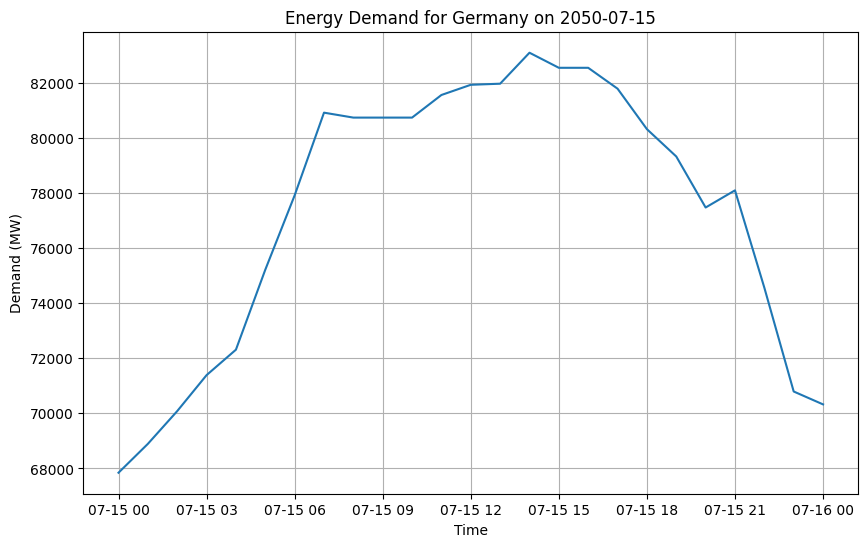

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def csv_to_time_series_and_plot(region_name, specific_day):
    """
    Reads a CSV file, converts it to a Pandas time series DataFrame, and plots the data for a specific day.

    Parameters:
    - region_name: str, name of the region
    - specific_day: str, specific day in the format 'YYYY-MM-DD'
    """
    # Construct the file path
    input_file = f"/Volumes/PJB1008_2/synde/resources/gegis/output/SyntheticDemand_{region_name}_ssp2-26-2050_2018.csv"
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Generate a datetime index for hourly data in the year 2050
    datetime_index = pd.date_range(start='2050-01-01', end='2050-12-31 23:00:00', freq='H')
    
    # Ensure the DataFrame has the correct number of rows
    if len(df) != len(datetime_index):
        raise ValueError("The number of rows in the DataFrame does not match the number of hours in the year 2050.")
    
    # Assign the datetime index to the DataFrame
    df.index = datetime_index
    
    # Ensure the specific day is in the correct format and exists within the DataFrame
    specific_day = pd.to_datetime(specific_day)
    if specific_day not in df.index:
        raise ValueError(f"The specific day {specific_day} is not within the range of the DataFrame index.")
    
    # Select data for the specific day
    day_data = df[specific_day:specific_day + pd.Timedelta(days=1)]
    
    # Assuming the DataFrame has columns for each region, we can sum or select the desired region data
    # Here we assume each column in the CSV corresponds to a region's demand data
    series = day_data.sum(axis=1)  # Summing all regions as an example, or select a specific column
    
    # Plot the time series for the specific day
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series.values)
    plt.title(f"Energy Demand for {region_name} on {specific_day.strftime('%Y-%m-%d')}")
    plt.xlabel("Time")
    plt.ylabel("Demand (MW)")
    plt.grid(True)
    plt.show()

# Example usage
csv_to_time_series_and_plot("Germany", "2050-07-15")


In [8]:
import h5py

# Open the .mat file
file_path = '/Volumes/PJB1008_2/synde/resources/gegis/output/GISwind2018/GISdata_wind2018_ssp1_europe.mat'
file = h5py.File(file_path, 'r')

# List all variables (keys) in the file
print("Keys: %s" % file.keys())

# Access and read data from a specific key
key_name = 'your_key_name'  # Replace with the actual key name you want to access
if key_name in file.keys():
    data = file[key_name][:]
    print(f"Data for {key_name}: {data}")
else:
    print(f"Key {key_name} not found in the file.")

# Example: Access and read data from all keys
data = file["CFtime_windonshoreA"][:]
print(f"{data}")

# Close the file when done
file.close()

Keys: <KeysViewHDF5 ['CFtime_windoffshore', 'CFtime_windonshoreA', 'CFtime_windonshoreB', 'capacity_offshore', 'capacity_onshoreA', 'capacity_onshoreB']>
Key your_key_name not found in the file.
[[[0.02658628 0.02934896 0.03608237 ... 0.36794471 0.34864967 0.36470559]
  [0.17088601 0.168497   0.16748026 ... 0.08267572 0.08911569 0.07530282]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [0.13771839 0.15076063 0.17147546 ... 0.16168687 0.15138778 0.15471555]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]

 [[0.07272607 0.07611655 0.0910403  ... 0.69524037 0.67137636 0.69197795]
  [0.20081673 0.2107956  0.2136352  ... 0.19485381 0.1968838  0.16372995]
  [0.86966444 0.88480441 0.89745435 ... 0.02762526 0.04213981 0.07345607]
  ...
  [0.3185438  0.34527068 0.37516313 ... 0.36310791 0.33541218 0.3324168 ]
  [       nan        nan        nan ...        nan 

In [3]:
import pandas as pd
# Load the CSV file
file_path = '/Volumes/PJB1008_2/synde/resources/gegis/output/ssp2-34-2050/SyntheticDemand_ups_ssp2-34-2050_2018.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Inspect the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df)

First few rows of the DataFrame:
               x1             x2            x3
0     6535.036013  181457.157064  29024.910126
1     6717.383477  168562.753595  29024.910126
2     6707.769518  166304.526273  29024.910126
3     6698.023721  165461.698997  28992.717999
4     6595.530939  165030.760885  29024.910126
...           ...            ...           ...
8755  6487.091294  209479.463184  25710.342735
8756  6487.091294  209479.463184  27342.728780
8757  6495.711405  203939.571194  28292.182062
8758  6495.711405  198460.060036  28766.929409
8759  6495.711405  194083.830112  29232.542392

[8760 rows x 3 columns]
